<a href="https://colab.research.google.com/github/Louisa328/Assignment-1/blob/main/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# 1.1 Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20,50,980)
spike_traffic = np.random.randint(1000,5000,20)
latency_logs = np.concatenate([normal_traffic,spike_traffic])

In [19]:
# 1.2 Manual MAD vs SD
def calculate_mad(data):
  median = np.median(data)
  absolute_deviations = np.abs(data - median)
  return np.median(absolute_deviations)
  mad = np.median(absolute_deviations)
  return mad
mad_value = calculate_mad(latency_logs)
sd_value = np.std(latency_logs)
mean_value = np.mean(latency_logs)
median_value = np.median(latency_logs)

print(f"MAD: {mad_value:.2f}ms")
print(f"SD: {sd_value:.2f}ms")
print(f"SD/MAD: {sd_value/mad_value:.2f}")
print()

MAD: 8.00ms
SD: 430.61ms
SD/MAD: 53.83



In [20]:
# 2.1 The False Positive Paradox
import numpy as np

def bayesian_audit(prior, sensitivity, specificity):
    """
    Calculate P(Cheater | Flagged) using Bayes' Theorem

    Parameters:
    - prior: base rate of cheating
    - sensitivity: P(Flagged | Cheater)
    - specificity: P(Not Flagged | Not Cheater)

    Returns:
    - posterior: P(Cheater | Flagged)
    """
    false_positive_rate = 1 - specificity
    p_flagged = sensitivity * prior + false_positive_rate * (1 - prior)
    posterior = (sensitivity * prior) / p_flagged
    return posterior

# Test parameters
sensitivity = 0.98
specificity = 0.98

# Three scenarios
scenarios = {
    'A (Bootcamp)': 0.50,
    'B (Econ Class)': 0.05,
    'C (Honors Seminar)': 0.001
}

print("False Positive Paradox\n")
for name, base_rate in scenarios.items():
    posterior = bayesian_audit(base_rate, sensitivity, specificity)
    print(f"Scenario {name}:")
    print(f"  Base Rate: {base_rate*100}%")
    print(f"  P(Cheater | Flagged): {posterior*100:.2f}%\n")

False Positive Paradox

Scenario A (Bootcamp):
  Base Rate: 50.0%
  P(Cheater | Flagged): 98.00%

Scenario B (Econ Class):
  Base Rate: 5.0%
  P(Cheater | Flagged): 72.06%

Scenario C (Honors Seminar):
  Base Rate: 0.1%
  P(Cheater | Flagged): 4.68%



In [23]:
#3.1 Detecting SRM
import numpy as np

control_users = 50250
treatment_users = 49750
total_users = 100000

expected_control = total_users/2
expected_treatment = total_users/2

observed = np.array([control_users, treatment_users])
expected = np.array([expected_control, expected_treatment])

chi_square = 0
for i in range(len(observed)):
    chi_square += (observed[i] - expected[i])**2 / expected[i]

print("SRM detection")
print(f"\nObserved: Control = {control_users}, Treatment = {treatment_users}")
print(f"Expected: Control = {expected_control}, Treatment = {expected_treatment}")
print(f"Chi-Square Statistic: {chi_square:.4f}")
print(f"Critical Value (p=0.05,df=1): 3.84")

if chi_square > 3.84:
    print("Reject the null hypothesis. SRM is detected.")
else:
    print("Fail to reject the null hypothesis. No SRM is detected.")

SRM detection

Observed: Control = 50250, Treatment = 49750
Expected: Control = 50000.0, Treatment = 50000.0
Chi-Square Statistic: 2.5000
Critical Value (p=0.05,df=1): 3.84
Fail to reject the null hypothesis. No SRM is detected.


--- CRYPTO BIAS REPORT (Alpha=1.0) ---
Total Market Sample: 10000 tokens
Reality (Mean of All):     $79,605.44
Perception (Mean of Top 1%): $3,595,557.50
---------------------------------------------
BIAS MAGNIFICATION: 45.17x


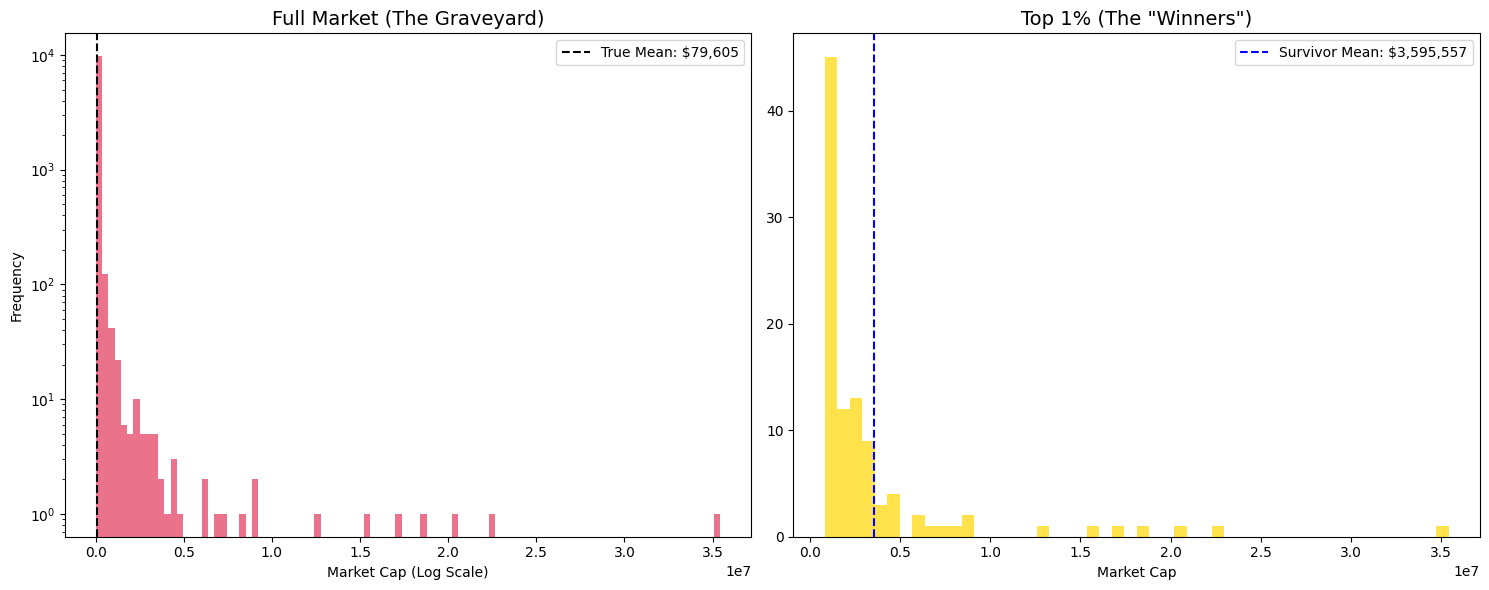

In [32]:
#4.1 Memecoin Graveyard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Simulation Setup ---
np.random.seed(42)
num_tokens = 10_000
scale_parameter = 10_000

# --- 2. Generate Distribution (Alpha = 1.0 for Heavy Tail) ---
# When alpha = 1.0, the mean is theoretically infinite in a true Pareto,
# but in a finite sample, it just results in massive outliers.
alpha = 1.0
raw_data = (np.random.pareto(alpha, num_tokens) + 1) * scale_parameter

# --- 3. Create DataFrames ---
df_all = pd.DataFrame(raw_data, columns=['Market_Cap'])

# Define threshold for the top 1% (Survivors)
threshold = df_all['Market_Cap'].quantile(0.99)
df_survivors = df_all[df_all['Market_Cap'] >= threshold].copy()

# --- 4. Evaluate: Calculate Statistics ---
mean_all = df_all['Market_Cap'].mean()
mean_survivors = df_survivors['Market_Cap'].mean()
bias_factor = mean_survivors / mean_all

print(f"--- CRYPTO BIAS REPORT (Alpha={alpha}) ---")
print(f"Total Market Sample: {num_tokens} tokens")
print(f"Reality (Mean of All):     ${mean_all:,.2f}")
print(f"Perception (Mean of Top 1%): ${mean_survivors:,.2f}")
print("-" * 45)
print(f"BIAS MAGNIFICATION: {bias_factor:.2f}x")

# --- 5. Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: The Full Market (Log Scale)
axes[0].hist(df_all['Market_Cap'], bins=100, color='crimson', alpha=0.6, log=True)
axes[0].axvline(mean_all, color='black', linestyle='--', label=f'True Mean: ${mean_all:,.0f}')
axes[0].set_title('Full Market (The Graveyard)', fontsize=14)
axes[0].set_xlabel('Market Cap (Log Scale)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot 2: The Survivors (Linear Scale)
axes[1].hist(df_survivors['Market_Cap'], bins=50, color='gold', alpha=0.7)
axes[1].axvline(mean_survivors, color='blue', linestyle='--', label=f'Survivor Mean: ${mean_survivors:,.0f}')
axes[1].set_title('Top 1% (The "Winners")', fontsize=14)
axes[1].set_xlabel('Market Cap')
axes[1].legend()

plt.tight_layout()
plt.show()